In [3]:
from src.sdg15_1_1 import SDG15_1_1
from user_params import UserParams

params = UserParams()

gfr = SDG15_1_1('', params.root_dir, params.data_dir, params.output_dir)

In [4]:
if params.single_year_test and all([params.lad_file_path, params.sam_file_path, params.nfi_file_path, params.year_start]):
    gfr.calculate_sdg(params.lad_file_path, params.sam_file_path, params.nfi_file_path, params.year_start)

if not params.single_year_test and all([params.year_start, params.year_end]):
    gfr.calculate_multiple_years(params.year_start, params.year_end)
    
else:
    print('Execution failed, please check necessary params:\n')
    params.print_params()

execution failed, please check necessary params:

root_dir = C:\Users\Cusse\Scripts\geo_work\sdg-15-1-1
data_dir = None
output_dir = None
year_start = 2017
year_end = 2022
single_year_test = True
lad_file_path = None
sam_file_path = None
nfi_file_path = None


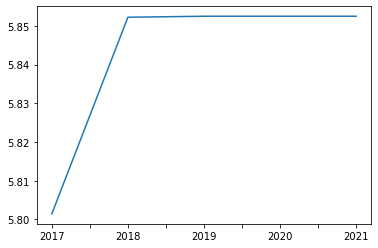

In [6]:
import glob
import pandas as pd

all_files = glob.glob(f'{params.root_dir}/sdg_15_1_1_output/*.csv')

dfs = []

for f in all_files:
    df = pd.read_csv(f, index_col=0)
    dfs.append(df)
    
wood_ts = pd.concat(dfs, axis=1)
wood_ts.columns = [col.split('_')[-1] for col in wood_ts.columns]
wood_ts.loc[wood_ts.index[1]].plot()

In [11]:
wood_ts.sort_values(by='2021', ascending=0).head(20)

,2017,2018,2019,2020,2021
W06000012,43.361921,43.355366,43.409895,43.368763,42.901186
E06000036,41.813308,41.647794,41.879210,41.818301,41.816642
E07000214,40.722489,41.687644,41.463351,41.297516,41.017855
E07000216,40.599160,40.441314,40.455239,40.430543,40.424205
E07000192,37.668972,37.669016,37.450064,36.818659,36.857319
E07000209,36.381116,36.499944,36.438617,36.418404,36.387627
E07000210,33.733110,33.726704,33.719039,33.850615,33.871988
S12000028,31.623849,31.672520,31.929610,32.432958,32.467069
S12000020,32.181555,32.230202,32.262340,32.222922,32.320077
W06000016,32.545639,32.569157,32.643510,32.607077,32.193357


In [2]:
from tests import TestSDGBase
from unittest import TextTestRunner, defaultTestLoader

TextTestRunner().run(defaultTestLoader.loadTestsFromTestCase(TestSDGBase))

.....

Setting up class
running test_get_input_data_dir
running test_get_output_data_dir
running test_get_read_function
running test_set_input_data_dir
running test_set_output_data_dir



----------------------------------------------------------------------
Ran 5 tests in 0.026s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>